In [61]:
import pandas as pd # to read CSV files (Comma Separated Values)

train_x = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/train.x.csv')
train_x.head()

,Id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att18,att19,att20,att21,att22,att23,att24,att25,att26,msd_track_id
0,1,41.08,6.579,4.307,3.421,3.192,2.076,2.179,2.052,1.794,...,1.3470,-0.2463,-1.5470,0.17920,-1.1530,-0.7370,0.40750,-0.67190,-0.05147,TRPLTEM128F92E1389
1,2,60.80,5.973,4.344,3.261,2.835,2.725,2.446,1.884,1.962,...,-0.3316,0.3519,-1.4760,0.52700,-2.1960,1.5990,-1.39000,0.22560,-0.72080,TRJWMBQ128F424155E
2,3,51.47,4.971,4.316,2.916,3.112,2.290,2.053,1.934,1.878,...,-0.2803,-0.1603,-0.1355,1.03500,0.2370,1.4890,0.02959,-0.13670,0.10820,TRRZWMO12903CCFCC2
3,4,41.28,6.610,4.411,2.602,2.822,2.126,1.984,1.973,1.945,...,-1.6930,1.0040,-0.3953,0.26710,-1.0450,0.4974,0.03724,1.04500,-0.20000,TRBZRUT12903CE6C04
4,5,54.17,8.945,4.685,4.208,3.154,3.527,2.733,2.202,2.686,...,2.4690,-0.5449,-0.5622,-0.08968,-0.9823,-0.2445,-1.65800,-0.04825,-0.70950,TRLUJQF128F42AF5BF


In [62]:
train_y = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/train.y.csv')
train_y.head()

,Id,class_label
0,1,International
1,2,Vocal
2,3,Latin
3,4,Blues
4,5,Vocal


In [63]:
test_x = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/test.x.csv')
test_x.head()

,Id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26
0,1,38.22,8.076,6.935,4.696,3.856,3.465,2.922,2.568,2.070,...,3.988,0.4957,0.1836,-2.2210,0.6453,-0.2923,1.2000,-0.09179,0.4674,0.2158
1,2,36.42,6.131,5.364,4.292,3.968,2.937,2.872,2.142,2.050,...,7.098,1.2290,0.5971,-1.0670,0.9569,-1.8240,2.3130,-0.80890,0.5612,-0.6225
2,3,70.01,5.496,4.698,3.699,3.258,2.293,2.680,2.226,2.034,...,4.449,0.4773,1.6370,-1.0690,2.4160,-0.6299,1.4190,-0.81960,0.9151,-0.5948
3,4,40.64,7.281,6.702,4.043,3.729,3.043,2.644,2.366,1.940,...,2.785,1.9000,-1.1370,1.2750,1.7920,-2.1250,1.6090,-0.83230,-0.1998,-0.1218
4,5,38.85,7.118,5.703,4.825,4.088,3.823,3.254,2.551,2.193,...,4.536,2.1470,1.0200,-0.2656,2.8050,0.2762,0.2504,1.04900,0.3447,-0.7689


In [64]:
test_y_sample = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/submission-random.csv')
test_y_sample.head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.0964,0.0884,0.0121,0.1004,0.0137,0.1214,0.0883,0.0765,0.0332,0.0445,0.1193,0.1019,0.1038
1,2,0.0121,0.0804,0.0376,0.0289,0.1310,0.0684,0.1044,0.0118,0.1562,0.0585,0.1633,0.1400,0.0073
2,3,0.1291,0.0985,0.0691,0.0356,0.0788,0.0529,0.1185,0.1057,0.1041,0.0075,0.0481,0.1283,0.0238
3,4,0.0453,0.1234,0.0931,0.0126,0.1224,0.0627,0.0269,0.0764,0.0812,0.1337,0.0357,0.0937,0.0930
4,5,0.0600,0.0915,0.0667,0.0947,0.0509,0.0335,0.1251,0.0202,0.1012,0.0365,0.1310,0.0898,0.0991


In [65]:
test_y_sample[:0]

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal


In [66]:
import numpy as np

train_X = np.array(train_x)
train_Y = np.array(train_y[:]['class_label'])
test_X = np.array(test_x)

# Getting rid of the first and the last column: Id and msd_track_id
X_train_val = np.array(train_X[:, 1:-1], dtype=float)
X_test = np.array(test_X[:, 1:], dtype=float)

train_Y.shape

(13000,)

In [67]:
from collections import Counter

# Count the freq of the keys in the training labels
counted_labels = Counter(train_Y)
labels_keys = counted_labels.keys()
labels_keys

dict_keys(['Vocal', 'New_Age', 'Rap', 'Folk', 'International', 'Blues', 'Country', 'Latin', 'Reggae', 'Electronic', 'Pop_Rock', 'RnB', 'Jazz'])

In [68]:
labels_keys_sorted = sorted(labels_keys)
labels_keys_sorted

['Blues',
 'Country',
 'Electronic',
 'Folk',
 'International',
 'Jazz',
 'Latin',
 'New_Age',
 'Pop_Rock',
 'Rap',
 'Reggae',
 'RnB',
 'Vocal']

In [69]:
# This for loop for creating a dictionary/ vocab
key_to_val = {key: val for val, key in enumerate(labels_keys_sorted)}
key_to_val['Country']
key_to_val

{'Blues': 0,
 'Country': 1,
 'Electronic': 2,
 'Folk': 3,
 'International': 4,
 'Jazz': 5,
 'Latin': 6,
 'New_Age': 7,
 'Pop_Rock': 8,
 'Rap': 9,
 'Reggae': 10,
 'RnB': 11,
 'Vocal': 12}

In [70]:
val_to_key = {val: key for val, key in enumerate(labels_keys_sorted)}
val_to_key[1]
val_to_key

{0: 'Blues',
 1: 'Country',
 2: 'Electronic',
 3: 'Folk',
 4: 'International',
 5: 'Jazz',
 6: 'Latin',
 7: 'New_Age',
 8: 'Pop_Rock',
 9: 'Rap',
 10: 'Reggae',
 11: 'RnB',
 12: 'Vocal'}

In [71]:
Y_train_vec = []
for each in train_y[:]['class_label']:
#     print(each, key_to_val[each])
    Y_train_vec.append(key_to_val[each])

Y_train_val = np.array(Y_train_vec)
Y_train_val.shape

(13000,)

In [72]:
# # Pre-processing: normalizing
# def normalize(X):
#     # max scale for images 255= 2**8= 8 bit grayscale for each channel
#     return (X - X.mean(axis=0)) #/ X.std(axis=0)
# X_train, X_val, X_test = normalize(X=X_train), normalize(X=X_val), normalize(X=X_test)

# Preprocessing: normalizing the data based on the training set
mean = X_train_val.mean(axis=0)
std = X_train_val.std(axis=0)

X_train_val, X_test = (X_train_val - mean)/ std, (X_test - mean)/ std
X_train_val.shape, X_test.shape, X_train_val.dtype, X_test.dtype

((13000, 26), (10400, 26), dtype('float64'), dtype('float64'))

In [73]:
# Creating validation set: 10% or 1/10 of the training set or whatever dataset with labels/ annotation
valid_size = X_train_val.shape[0]//10
valid_size
X_val = X_train_val[-valid_size:]
Y_val = Y_train_val[-valid_size:]
X_train = X_train_val[: -valid_size]
Y_train = Y_train_val[: -valid_size]
X_train_val.shape, 
X_train.shape, X_val.shape, X_test.shape, Y_val.shape, Y_train.shape 
# X_train.dtype, X_val.dtype
# Y_train.dtype, Y_val

((11700, 26), (1300, 26), (10400, 26), (1300,), (11700,))

In [74]:
# Model
import impl.layer as l # or from impl.layer import *
from impl.loss import * # import all functions from impl.loss file # import impl.loss as loss_func
from sklearn.utils import shuffle as skshuffle

class FFNN:

    def __init__(self, D, C, H, L):
        self.L = L # number of layers or depth
        self.losses = {'train':[], 'valid':[], 'valid_acc':[]}
        
        # The adaptive/learnable/updatable random feedforward
        self.model = []
        self.W_fixed = []
        self.grads = []
        self.ys_prev = []
        low, high = -1, 1
        
        # Input layer: weights/ biases
        m = dict(W=np.random.uniform(size=(D, H), low=low, high=high) / np.sqrt(D / 2.), b=np.zeros((1, H)))
        self.model.append(m)
        # Fixed feedback weight
        m = np.random.uniform(size=(D, H), low=low, high=high) / np.sqrt(D / 2.)
        self.W_fixed.append(m)
        # Input layer: gradients
        self.grads.append({key: np.zeros_like(val) for key, val in self.model[0].items()})
        # Previous output layer
        self.ys_prev.append(0.0)

        # Hidden layers: weights/ biases
        m_L = []
        for _ in range(L):
            m = dict(W=np.random.uniform(size=(H, H), low=low, high=high) / np.sqrt(H / 2.), b=np.zeros((1, H)))
            m_L.append(m)
        self.model.append(m_L)
        # Fixed feedback weight
        m_L = []
        for _ in range(L):
            m = np.random.uniform(size=(H, H), low=low, high=high) / np.sqrt(H / 2.)
            m_L.append(m)
        self.W_fixed.append(m_L)
        # Hidden layer: gradients
        grad_L = []
        for _ in range(L):
            grad_L.append({key: np.zeros_like(val) for key, val in self.model[1][0].items()})
        self.grads.append(grad_L)
        # Previous output layer
        ys_prev_L = []
        for _ in range(L):
            ys_prev_L.append(0.0)
        self.ys_prev.append(ys_prev_L)
        
        # Output layer: weights/ biases
        m = dict(W=np.random.uniform(size=(H, C), low=low, high=high) / np.sqrt(H / 2.), b=np.zeros((1, C)))
        self.model.append(m)
        # Fixed feedback weight
        m = np.random.uniform(size=(H, C), low=low, high=high) / np.sqrt(H / 2.)
        self.W_fixed.append(m)
        # Outout layer: gradients
        self.grads.append({key: np.zeros_like(val) for key, val in self.model[2].items()})
        # Previous output layer
        self.ys_prev.append(0.0)
        
    def fc_forward(self, X, W, b):
        out = (X @ W) + b
        cache = (W, X)
        return out, cache

    def fc_backward(self, dout, cache, W_fixed):
        W, X = cache

        dW = X.T @ dout
        db = np.sum(dout, axis=0).reshape(1, -1) # db_1xn
        
        dX = dout @ W.T # Backprop
#         dX = dout @ W_fixed.T # fb alignment

        return dX, dW, db

    def train_forward(self, X, train):
        caches, ys = [], []
        
        # Input layer
        y, fc_cache = self.fc_forward(X=X, W=self.model[0]['W'], b=self.model[0]['b']) # X_1xD, y_1xc
        y, nl_cache = l.tanh_forward(X=y)
        if train:
            caches.append((fc_cache, nl_cache))
        ys.append(y) # ys[0]
        X = y.copy() # pass to the next layer
        
        # Hidden layers
        fc_caches, nl_caches, ys_L = [], [], []
        for layer in range(self.L):
            y, fc_cache = self.fc_forward(X=X, W=self.model[1][layer]['W'], b=self.model[1][layer]['b'])
            y, nl_cache = l.tanh_forward(X=y)
            ys_L.append(y) # ys[1][layer]
            X = y.copy() # pass to next layer
            if train:
                fc_caches.append(fc_cache)
                nl_caches.append(nl_cache)
        if train:
            caches.append((fc_caches, nl_caches)) # caches[1]            
        ys.append(ys_L) # ys[1]            
        
        # Output layer
        y, fc_cache = self.fc_forward(X=X, W=self.model[2]['W'], b=self.model[2]['b'])
        if train:
            caches.append(fc_cache)
        ys.append(y) # ys[2]

        return ys, caches # for backpropating the error

    def loss_function(self, y, y_train):
        
        loss = cross_entropy(y, y_train) # softmax is included
        dy = dcross_entropy(y, y_train) # dsoftmax is included
        
        return loss, dy
        
    def train_backward(self, dy, caches, ys):
        grads, ys_prev = self.grads, self.ys_prev # initialized by Zero in every iteration/epoch
        
        # Output layer
        fc_cache = caches[2]
        dX, dW, db = self.fc_backward(dout=dy, cache=fc_cache, W_fixed=self.W_fixed[2])
        dy = dX.copy()
        grads[2]['W'] = dW
        grads[2]['b'] = db

        # Hidden layer
        fc_caches, nl_caches = caches[1]
        for layer in reversed(range(self.L)):
#             dy *= ys[1][layer] - ys_prev[1][layer] # temporal diff instead of differentiable function
            dy = l.tanh_backward(cache=nl_caches[layer], dout=dy) # diffable function
            dX, dW, db = self.fc_backward(dout=dy, cache=fc_caches[layer], W_fixed=self.W_fixed[1][layer])
            dy = dX.copy()
            grads[1][layer]['W'] = dW
            grads[1][layer]['b'] = db
        
        # Input layer
        fc_cache, nl_cache = caches[0]
#         dy *= ys[0] - ys_prev[0] # temporal diff instead of differentiable function
        dy = l.tanh_backward(cache=nl_cache, dout=dy) # diffable function
        dX, dW, db = self.fc_backward(dout=dy, cache=fc_cache, W_fixed=self.W_fixed[0])
        grads[0]['W'] = dW
        grads[0]['b'] = db

        return dX, grads
    
    def test(self, X):
        ys_logit, _ = self.train_forward(X, train=False)
        y_logit = ys_logit[2] # last layer
        
        # if self.mode == 'classification':
        y_prob = l.softmax(y_logit) # for accuracy == acc
        y_pred = np.argmax(y_prob, axis=1) # for loss ==err
        
        return y_pred, y_logit
        
    def get_minibatch(self, X, y, minibatch_size, shuffle):
        minibatches = []

        if shuffle:
            X, y = skshuffle(X, y)

        for i in range(0, X.shape[0], minibatch_size):
            X_mini = X[i:i + minibatch_size]
            y_mini = y[i:i + minibatch_size]
            minibatches.append((X_mini, y_mini))

        return minibatches

    def sgd(self, train_set, val_set, alpha, mb_size, n_iter, print_after):
        X_train, y_train = train_set
        X_val, y_val = val_set

        # Epochs
        for iter in range(1, n_iter + 1):

            # Minibatches
            minibatches = self.get_minibatch(X_train, y_train, mb_size, shuffle=True)
            idx = np.random.randint(0, len(minibatches))
            X_mini, y_mini = minibatches[idx]
            
            # Train the model
            ys, caches = self.train_forward(X_mini, train=True)
            loss, dy = self.loss_function(ys[2], y_mini)
            _, grads = self.train_backward(dy, caches, ys) # ys[0], ys[1] and ys_prev are used for backprop
            self.ys_prev = ys # for next iteration or epoch learning dW and db
            self.losses['train'].append(loss)
            
            # Update the model for input layer
            for key in grads[0].keys():
                self.model[0][key] -= alpha * grads[0][key]

            # Update the model for the hidden layers
            for layer in range(self.L):
                for key in grads[1][layer].keys():
                    self.model[1][layer][key] -= alpha * grads[1][layer][key]

            # Update the model for output layer
            for key in grads[2].keys():
                self.model[2][key] -= alpha * grads[2][key]
                
            # Validate the updated model
            y_pred, y_logit = self.test(X_val)
            valid_loss, _ = self.loss_function(y_logit, y_val) # softmax is included in entropy loss function
            self.losses['valid'].append(valid_loss)
            valid_acc = np.mean(y_pred == y_val) # confusion matrix
            self.losses['valid_acc'].append(valid_acc)
            
            # Print the model info: loss & accuracy or err & acc
            if iter % print_after == 0:
                print('Iter-{} train loss: {:.4f} valid loss: {:.4f}, valid accuracy: {:.4f}'.format(
                    iter, loss, valid_loss, valid_acc))

#         # Test the final model
#         y_pred, y_logit = nn.test(X_test)
#         loss, _ = self.loss_function(y_logit, y_test) # softmax is included in entropy loss function
#         acc = np.mean(y_pred == y_test)
#         print('Last iteration - Test accuracy mean: {:.4f}, std: {:.4f}, loss: {:.4f}'.format(
#             acc.mean(), acc.std(), loss))

In [75]:
Y_train.shape, X_train.shape, X_val.shape, Y_val.shape

((11700,), (11700, 26), (1300, 26), (1300,))

In [76]:
# Hyper-parameters
n_iter = 1000000 # number of epochs
alpha = 1e-3 # learning_rate
mb_size = 50 # 2**10==1024 # width, timestep for sequential data or minibatch size
print_after = 1000 # n_iter//10 # print loss for train, valid, and test
num_hidden_units = 32 # number of kernels/ filters in each layer
num_input_units = X_train.shape[1] # noise added at the input lavel as input noise we can use dX or for more improvement
num_output_units = Y_train.max() + 1 # number of classes in this classification problem
# num_output_units = Y_train.shape[1] # number of classes in this classification problem
num_layers = 2 # depth 

# Build the model/NN and learn it: running session.
nn = FFNN(C=num_output_units, D=num_input_units, H=num_hidden_units, L=num_layers)

nn.sgd(train_set=(X_train, Y_train), val_set=(X_val, Y_val), mb_size=mb_size, alpha=alpha, 
           n_iter=n_iter, print_after=print_after)

Iter-1000 train loss: 2.5603 valid loss: 2.5146, valid accuracy: 0.1246
Iter-2000 train loss: 2.4604 valid loss: 2.4720, valid accuracy: 0.1523
Iter-3000 train loss: 2.4784 valid loss: 2.4326, valid accuracy: 0.1769
Iter-4000 train loss: 2.4252 valid loss: 2.3950, valid accuracy: 0.1946
Iter-5000 train loss: 2.2862 valid loss: 2.3590, valid accuracy: 0.2062
Iter-6000 train loss: 2.2241 valid loss: 2.3254, valid accuracy: 0.2192
Iter-7000 train loss: 2.1832 valid loss: 2.2962, valid accuracy: 0.2285
Iter-8000 train loss: 2.2419 valid loss: 2.2711, valid accuracy: 0.2369
Iter-9000 train loss: 2.2343 valid loss: 2.2505, valid accuracy: 0.2469
Iter-10000 train loss: 2.2129 valid loss: 2.2330, valid accuracy: 0.2515
Iter-11000 train loss: 2.1714 valid loss: 2.2174, valid accuracy: 0.2592
Iter-12000 train loss: 2.2901 valid loss: 2.2037, valid accuracy: 0.2600
Iter-13000 train loss: 2.2446 valid loss: 2.1911, valid accuracy: 0.2669
Iter-14000 train loss: 2.0900 valid loss: 2.1801, valid accu

Iter-114000 train loss: 1.8205 valid loss: 1.9965, valid accuracy: 0.3462
Iter-115000 train loss: 1.8669 valid loss: 1.9962, valid accuracy: 0.3454
Iter-116000 train loss: 1.6765 valid loss: 1.9961, valid accuracy: 0.3423
Iter-117000 train loss: 1.8666 valid loss: 1.9961, valid accuracy: 0.3431
Iter-118000 train loss: 2.0276 valid loss: 1.9954, valid accuracy: 0.3462
Iter-119000 train loss: 1.8822 valid loss: 1.9948, valid accuracy: 0.3469
Iter-120000 train loss: 1.9185 valid loss: 1.9945, valid accuracy: 0.3492
Iter-121000 train loss: 1.7843 valid loss: 1.9938, valid accuracy: 0.3492
Iter-122000 train loss: 2.0377 valid loss: 1.9931, valid accuracy: 0.3469
Iter-123000 train loss: 1.8690 valid loss: 1.9935, valid accuracy: 0.3469
Iter-124000 train loss: 1.8059 valid loss: 1.9933, valid accuracy: 0.3462
Iter-125000 train loss: 1.7603 valid loss: 1.9928, valid accuracy: 0.3477
Iter-126000 train loss: 2.1523 valid loss: 1.9924, valid accuracy: 0.3446
Iter-127000 train loss: 1.6247 valid l

Iter-225000 train loss: 1.8743 valid loss: 1.9740, valid accuracy: 0.3423
Iter-226000 train loss: 1.6685 valid loss: 1.9738, valid accuracy: 0.3415
Iter-227000 train loss: 1.8358 valid loss: 1.9744, valid accuracy: 0.3400
Iter-228000 train loss: 1.9261 valid loss: 1.9726, valid accuracy: 0.3423
Iter-229000 train loss: 1.6622 valid loss: 1.9729, valid accuracy: 0.3431
Iter-230000 train loss: 1.7307 valid loss: 1.9727, valid accuracy: 0.3415
Iter-231000 train loss: 1.6790 valid loss: 1.9730, valid accuracy: 0.3446
Iter-232000 train loss: 1.6180 valid loss: 1.9740, valid accuracy: 0.3423
Iter-233000 train loss: 1.7506 valid loss: 1.9743, valid accuracy: 0.3392
Iter-234000 train loss: 1.8223 valid loss: 1.9734, valid accuracy: 0.3431
Iter-235000 train loss: 1.7117 valid loss: 1.9728, valid accuracy: 0.3415
Iter-236000 train loss: 1.9383 valid loss: 1.9742, valid accuracy: 0.3438
Iter-237000 train loss: 1.8298 valid loss: 1.9746, valid accuracy: 0.3408
Iter-238000 train loss: 1.9714 valid l

Iter-336000 train loss: 2.0871 valid loss: 1.9719, valid accuracy: 0.3508
Iter-337000 train loss: 1.8579 valid loss: 1.9719, valid accuracy: 0.3531
Iter-338000 train loss: 1.8853 valid loss: 1.9725, valid accuracy: 0.3523
Iter-339000 train loss: 1.6634 valid loss: 1.9750, valid accuracy: 0.3485
Iter-340000 train loss: 1.7288 valid loss: 1.9731, valid accuracy: 0.3492
Iter-341000 train loss: 1.7074 valid loss: 1.9735, valid accuracy: 0.3515
Iter-342000 train loss: 1.7615 valid loss: 1.9716, valid accuracy: 0.3531
Iter-343000 train loss: 1.7258 valid loss: 1.9718, valid accuracy: 0.3508
Iter-344000 train loss: 1.7020 valid loss: 1.9737, valid accuracy: 0.3523
Iter-345000 train loss: 1.8790 valid loss: 1.9723, valid accuracy: 0.3508
Iter-346000 train loss: 1.6565 valid loss: 1.9719, valid accuracy: 0.3485
Iter-347000 train loss: 1.9143 valid loss: 1.9725, valid accuracy: 0.3500
Iter-348000 train loss: 1.8740 valid loss: 1.9737, valid accuracy: 0.3469
Iter-349000 train loss: 1.6547 valid l

Iter-447000 train loss: 1.8769 valid loss: 1.9832, valid accuracy: 0.3638
Iter-448000 train loss: 1.6836 valid loss: 1.9839, valid accuracy: 0.3623
Iter-449000 train loss: 1.7194 valid loss: 1.9845, valid accuracy: 0.3615
Iter-450000 train loss: 1.5618 valid loss: 1.9819, valid accuracy: 0.3646
Iter-451000 train loss: 1.6949 valid loss: 1.9816, valid accuracy: 0.3615
Iter-452000 train loss: 1.6640 valid loss: 1.9822, valid accuracy: 0.3638
Iter-453000 train loss: 1.8140 valid loss: 1.9831, valid accuracy: 0.3623
Iter-454000 train loss: 1.7045 valid loss: 1.9832, valid accuracy: 0.3638
Iter-455000 train loss: 1.5852 valid loss: 1.9827, valid accuracy: 0.3585
Iter-456000 train loss: 1.9973 valid loss: 1.9856, valid accuracy: 0.3585
Iter-457000 train loss: 1.9220 valid loss: 1.9854, valid accuracy: 0.3608
Iter-458000 train loss: 1.8857 valid loss: 1.9854, valid accuracy: 0.3585
Iter-459000 train loss: 1.7775 valid loss: 1.9853, valid accuracy: 0.3608
Iter-460000 train loss: 1.6827 valid l

Iter-558000 train loss: 1.8923 valid loss: 1.9980, valid accuracy: 0.3531
Iter-559000 train loss: 2.0134 valid loss: 1.9970, valid accuracy: 0.3515
Iter-560000 train loss: 1.7058 valid loss: 1.9983, valid accuracy: 0.3531
Iter-561000 train loss: 1.8150 valid loss: 1.9966, valid accuracy: 0.3546
Iter-562000 train loss: 1.5376 valid loss: 1.9996, valid accuracy: 0.3485
Iter-563000 train loss: 1.7031 valid loss: 1.9998, valid accuracy: 0.3508
Iter-564000 train loss: 1.6090 valid loss: 1.9985, valid accuracy: 0.3500
Iter-565000 train loss: 1.4837 valid loss: 1.9998, valid accuracy: 0.3538
Iter-566000 train loss: 1.7642 valid loss: 2.0006, valid accuracy: 0.3454
Iter-567000 train loss: 1.8408 valid loss: 1.9988, valid accuracy: 0.3523
Iter-568000 train loss: 1.5572 valid loss: 1.9992, valid accuracy: 0.3492
Iter-569000 train loss: 1.7766 valid loss: 1.9976, valid accuracy: 0.3523
Iter-570000 train loss: 1.5863 valid loss: 1.9979, valid accuracy: 0.3500
Iter-571000 train loss: 1.5575 valid l

Iter-669000 train loss: 1.5261 valid loss: 2.0112, valid accuracy: 0.3538
Iter-670000 train loss: 1.9046 valid loss: 2.0104, valid accuracy: 0.3508
Iter-671000 train loss: 1.7125 valid loss: 2.0123, valid accuracy: 0.3546
Iter-672000 train loss: 1.6547 valid loss: 2.0127, valid accuracy: 0.3538
Iter-673000 train loss: 1.5064 valid loss: 2.0117, valid accuracy: 0.3569
Iter-674000 train loss: 2.0309 valid loss: 2.0118, valid accuracy: 0.3538
Iter-675000 train loss: 1.6054 valid loss: 2.0127, valid accuracy: 0.3608
Iter-676000 train loss: 1.6547 valid loss: 2.0114, valid accuracy: 0.3577
Iter-677000 train loss: 1.4439 valid loss: 2.0133, valid accuracy: 0.3569
Iter-678000 train loss: 1.5641 valid loss: 2.0107, valid accuracy: 0.3585
Iter-679000 train loss: 1.8433 valid loss: 2.0121, valid accuracy: 0.3546
Iter-680000 train loss: 1.5805 valid loss: 2.0102, valid accuracy: 0.3577
Iter-681000 train loss: 1.6560 valid loss: 2.0100, valid accuracy: 0.3538
Iter-682000 train loss: 1.6367 valid l

Iter-780000 train loss: 1.7552 valid loss: 2.0273, valid accuracy: 0.3485
Iter-781000 train loss: 1.5395 valid loss: 2.0267, valid accuracy: 0.3492
Iter-782000 train loss: 1.5447 valid loss: 2.0269, valid accuracy: 0.3562
Iter-783000 train loss: 1.6251 valid loss: 2.0269, valid accuracy: 0.3508
Iter-784000 train loss: 1.5674 valid loss: 2.0266, valid accuracy: 0.3523
Iter-785000 train loss: 1.7104 valid loss: 2.0262, valid accuracy: 0.3554
Iter-786000 train loss: 1.8127 valid loss: 2.0261, valid accuracy: 0.3500
Iter-787000 train loss: 1.5208 valid loss: 2.0270, valid accuracy: 0.3469
Iter-788000 train loss: 1.5761 valid loss: 2.0282, valid accuracy: 0.3546
Iter-789000 train loss: 1.6907 valid loss: 2.0272, valid accuracy: 0.3500
Iter-790000 train loss: 1.9503 valid loss: 2.0272, valid accuracy: 0.3500
Iter-791000 train loss: 1.7036 valid loss: 2.0273, valid accuracy: 0.3523
Iter-792000 train loss: 1.3376 valid loss: 2.0311, valid accuracy: 0.3500
Iter-793000 train loss: 1.3852 valid l

Iter-891000 train loss: 1.6402 valid loss: 2.0428, valid accuracy: 0.3546
Iter-892000 train loss: 1.4655 valid loss: 2.0436, valid accuracy: 0.3515
Iter-893000 train loss: 1.5982 valid loss: 2.0446, valid accuracy: 0.3500
Iter-894000 train loss: 1.7058 valid loss: 2.0437, valid accuracy: 0.3500
Iter-895000 train loss: 1.7331 valid loss: 2.0443, valid accuracy: 0.3515
Iter-896000 train loss: 1.6047 valid loss: 2.0423, valid accuracy: 0.3492
Iter-897000 train loss: 1.6494 valid loss: 2.0415, valid accuracy: 0.3492
Iter-898000 train loss: 1.5811 valid loss: 2.0419, valid accuracy: 0.3546
Iter-899000 train loss: 1.5413 valid loss: 2.0426, valid accuracy: 0.3492
Iter-900000 train loss: 1.6444 valid loss: 2.0447, valid accuracy: 0.3485
Iter-901000 train loss: 1.7227 valid loss: 2.0427, valid accuracy: 0.3546
Iter-902000 train loss: 1.4700 valid loss: 2.0410, valid accuracy: 0.3462
Iter-903000 train loss: 1.5886 valid loss: 2.0411, valid accuracy: 0.3500
Iter-904000 train loss: 1.5965 valid l

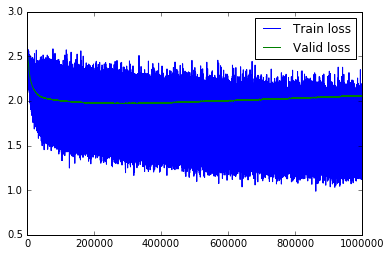

In [77]:
# # Display the learning curve and losses for training, validation, and testing
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(nn.losses['train'], label='Train loss')
plt.plot(nn.losses['valid'], label='Valid loss')
plt.legend()
plt.show()

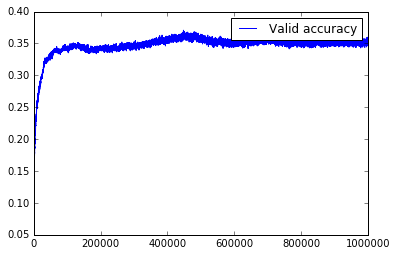

In [78]:
plt.plot(nn.losses['valid_acc'], label='Valid accuracy')
plt.legend()
plt.show()

In [79]:
heading = labels_keys_sorted.copy()
heading.insert(0, 'Id')
heading

['Id',
 'Blues',
 'Country',
 'Electronic',
 'Folk',
 'International',
 'Jazz',
 'Latin',
 'New_Age',
 'Pop_Rock',
 'Rap',
 'Reggae',
 'RnB',
 'Vocal']

In [80]:
y_pred, y_logits = nn.test(X_test)
y_prob = l.softmax(y_logits)
y_prob.shape, X_test.shape, y_logits.shape, test_y_sample.shape, test_y_sample[:1]

((10400, 13),
 (10400, 26),
 (10400, 13),
 (10400, 14),
    Id   Blues  Country  Electronic    Folk  International    Jazz   Latin  \
 0   1  0.0964   0.0884      0.0121  0.1004         0.0137  0.1214  0.0883   
 
    New_Age  Pop_Rock     Rap  Reggae     RnB   Vocal  
 0   0.0765    0.0332  0.0445  0.1193  0.1019  0.1038  )

In [81]:
pred_list = []
for Id, pred in enumerate(y_prob):
#     print(Id+1, *pred)
    pred_list.append([Id+1, *pred])

In [82]:
pred_file = open(file='prediction.csv', mode='w')
pred_file.write('\n') # because of the previous line        

for idx in range(len(heading)):
    if idx < len(heading) - 1:
        pred_file.write(heading[idx] + ',')
    else:
        pred_file.write(heading[idx] + '\n')        

# len(test), test[0]
# for key in test:
for i in range(len(pred_list)): # rows
    for j in range(len(pred_list[i])): # cols
        if j < (len(pred_list[i]) - 1):
            pred_file.write(str(pred_list[i][j]))
            pred_file.write(',')
        else: # last item before starting a new line
            pred_file.write(str(pred_list[i][j]) + '\n')        

# pred_file.write(-',')
pred_file.close()

In [83]:
pd.read_csv(filepath_or_buffer='prediction.csv').head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.020769,0.000896,0.005076,0.001435,0.008920,0.010687,0.015555,0.007284,0.004823,0.471912,0.443211,0.005287,0.004146
1,2,0.111895,0.002969,0.001409,0.004355,0.052704,0.006349,0.171247,0.008251,0.010501,0.067255,0.545532,0.011674,0.005859
2,3,0.027999,0.005736,0.005783,0.001734,0.026342,0.000934,0.005800,0.001806,0.032167,0.173455,0.691620,0.022625,0.004001
3,4,0.026503,0.006638,0.009442,0.014912,0.012117,0.004456,0.002983,0.003679,0.015035,0.030826,0.806138,0.031182,0.036088
4,5,0.008471,0.000145,0.020792,0.000240,0.006638,0.001272,0.010574,0.000702,0.008070,0.701781,0.234770,0.006261,0.000282


In [84]:
pd.read_csv(filepath_or_buffer='prediction.csv').shape, test_y_sample.shape

((10400, 14), (10400, 14))

In [85]:
test_y_sample.head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.0964,0.0884,0.0121,0.1004,0.0137,0.1214,0.0883,0.0765,0.0332,0.0445,0.1193,0.1019,0.1038
1,2,0.0121,0.0804,0.0376,0.0289,0.1310,0.0684,0.1044,0.0118,0.1562,0.0585,0.1633,0.1400,0.0073
2,3,0.1291,0.0985,0.0691,0.0356,0.0788,0.0529,0.1185,0.1057,0.1041,0.0075,0.0481,0.1283,0.0238
3,4,0.0453,0.1234,0.0931,0.0126,0.1224,0.0627,0.0269,0.0764,0.0812,0.1337,0.0357,0.0937,0.0930
4,5,0.0600,0.0915,0.0667,0.0947,0.0509,0.0335,0.1251,0.0202,0.1012,0.0365,0.1310,0.0898,0.0991
